# Setup

In [30]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.6/99.8 MB 7.0 MB/s eta 0:00:15
    --------------------------------------- 1.3/99.8 MB 10.1 MB/s eta 0:00:10
    --------------------------------------- 2.2/99.8 MB 12.6 MB/s eta 0:00:08
   - -------------------------------------- 3.1/99.8 MB 14.1 MB/s eta 0:00:07
   - -------------------------------------- 4.3/99.8 MB 16.2 MB/s eta 0:00:06
   -- ------------------------------------- 5.5/99.8 MB 17.5 MB/s eta 0:00:06
   -- ------------------------------------- 7.0/99.8 MB 19.5 MB/s eta 0:00:05
   --- ------------------------------------ 8.8/99.8 MB 21.6 MB/s eta 0:00:05
   ---- ----------------------------------- 10.5/99.8 MB 26.2 MB/s eta 0:00:04
   ---- ----------------------------------- 12.4/99.8 MB 31.2 MB/s eta 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('./data/consumption.csv', sep=',')
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


## Data analysis & preparation

In [5]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [6]:
# Check data for missing values
data.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

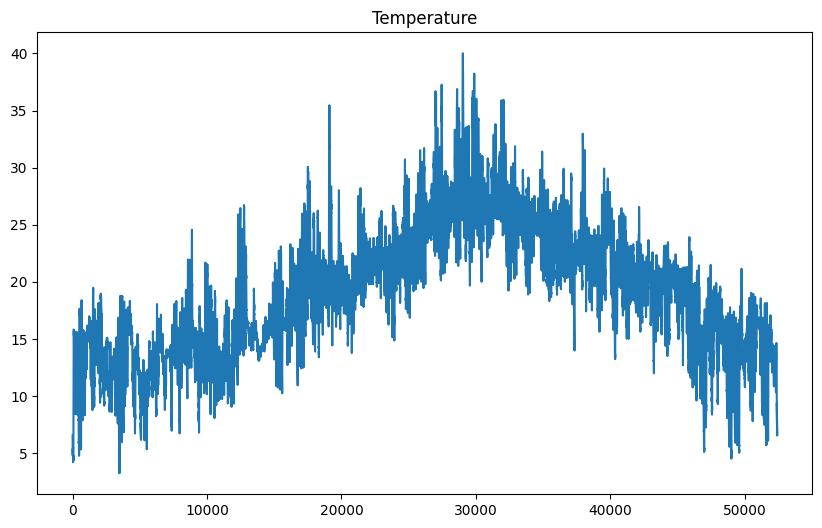

In [9]:
# plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Temperature'])
plt.title('Temperature')
plt.show()

In [11]:
# show min and max date
print('Min date:', data['DateTime'].min())
print('Max date:', data['DateTime'].max())

Min date: 1/1/2017 0:00
Max date: 9/9/2017 9:50


In [12]:
# drop DateTime column
data = data.drop(columns=['DateTime'])


Text(0.5, 1.0, 'Correlation matrix')

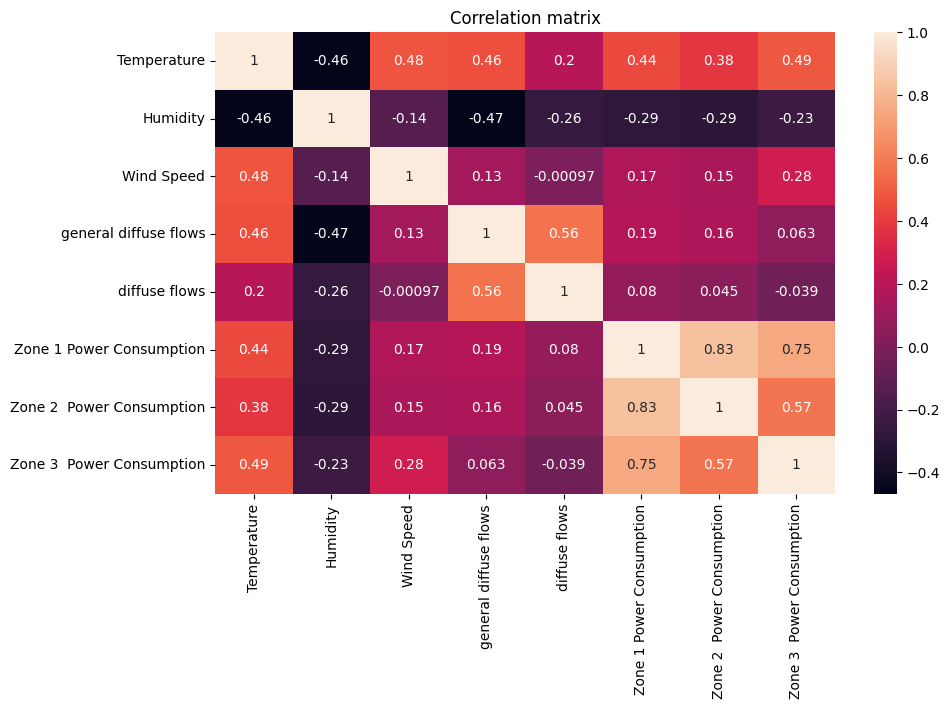

In [13]:
# plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation matrix')

In [18]:
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [22]:
data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [24]:
# merge colums to get the total consumption
data['TotalConsumption'] = data['Zone 1 Power Consumption'] + data['Zone 2  Power Consumption'] + data['Zone 3  Power Consumption']

# drop the columns
data = data.drop(columns=['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'])

In [25]:
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,TotalConsumption
0,6.559,73.8,0.083,0.051,0.119,70425.53544
1,6.414,74.5,0.083,0.070,0.085,69320.84387
2,6.313,74.5,0.080,0.062,0.100,67803.22193
3,6.121,75.0,0.083,0.091,0.096,65489.23209
4,5.921,75.7,0.081,0.048,0.085,63650.44627


Text(0.5, 1.0, 'Correlation matrix')

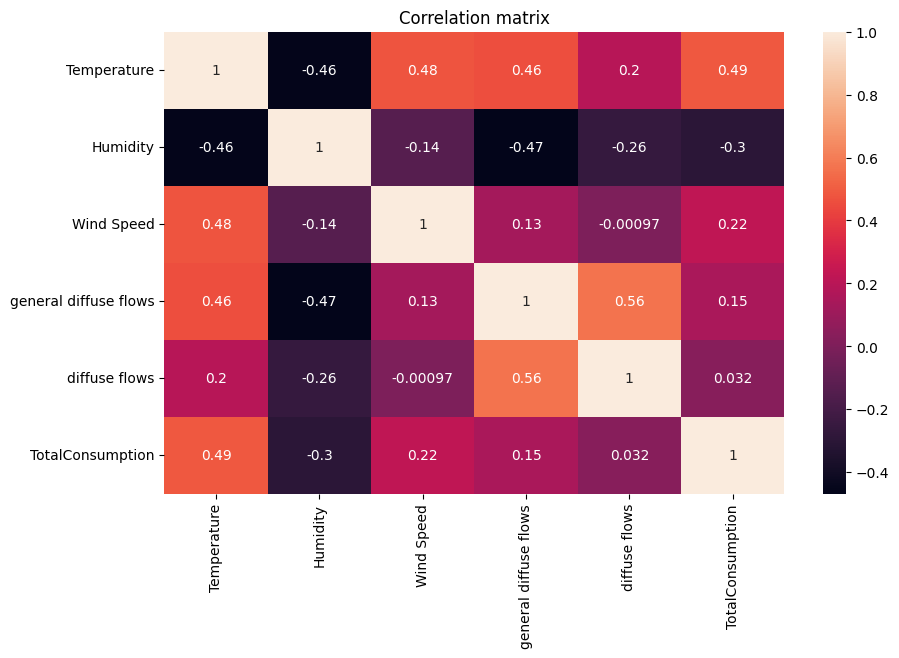

In [26]:
# plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation matrix')

## Model training

In [29]:
# split data into features and target
X = data.drop(columns=['TotalConsumption'])
y = data['TotalConsumption']

# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from xgboost import XGBRegressor
model = XGBRegressor()

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def rate_my_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print('MSE:', mse)
    r2 = r2_score(y_test, y_pred)
    print('R2:', r2)
    mae = mean_absolute_error(y_test, y_pred)
    print('MAE:', mae)

    # plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='True values')
    plt.plot(y_pred, label='Predicted values')
    plt.legend()

MSE: 129017891.67629221
R2: 0.5576611968207276
MAE: 8323.356481778495


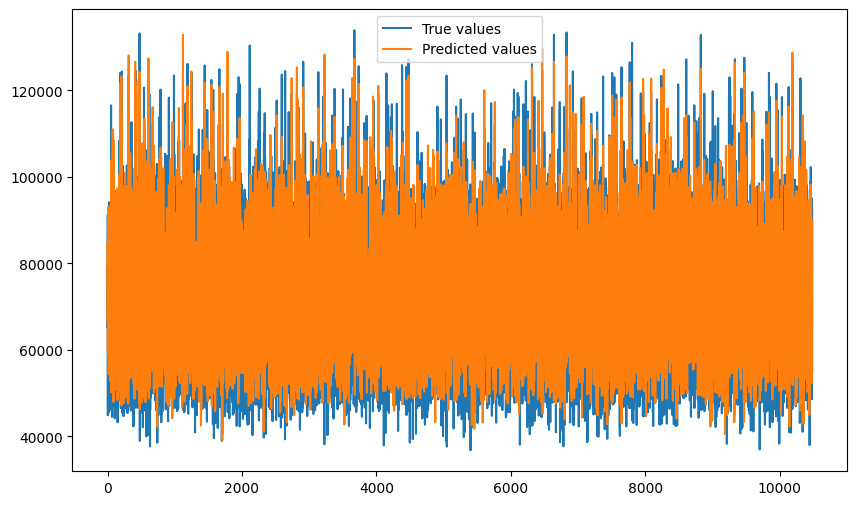

In [37]:
# predict the values
y_pred = model.predict(X_test)

rate_my_model(y_test, y_pred)

In [43]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 15],
    'booster': ['gbtree', 'dart'],
    'n_estimators': [100, 200, 400]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'booster': 'dart', 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}

MSE: 112091709.31166975
R2: 0.6156927392082475
MAE: 7037.320636140929


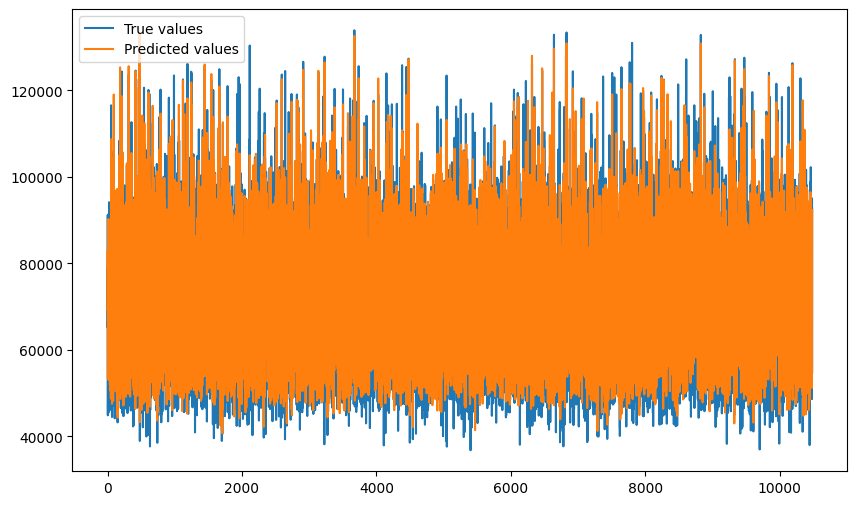

In [44]:
# predict the values
y_pred = grid_search.predict(X_test)

rate_my_model(y_test, y_pred)